In [37]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [38]:
df1 = pd.read_csv("examples/Date_Data01.csv")
print(df1.shape) # / index(row) / column 확인
df1.head()

(15000, 7)


,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [40]:
df1["날짜"] # Series 형태로 출력

0        2019-05-16
1        2019-05-16
2        2019-05-16
3        2019-05-16
4        2019-05-16
            ...    
14995    2019-08-07
14996    2019-08-07
14997    2019-08-07
14998    2019-08-07
14999    2019-08-07
Name: 날짜, Length: 15000, dtype: object

In [41]:
df1["날짜_datetime"] = pd.to_datetime(df1["날짜"]) # 데이터 타입을 변경, 새로운 컬럼을 선언

In [42]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16


In [43]:
df1["연도"] = df1["날짜_datetime"].dt.year

In [44]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019


In [45]:
pd.pivot_table(data=df1, index="연도", values="출고수량", aggfunc="sum") # 연도별 출고수량을 합산

,출고수량
연도,
2019,108078


In [46]:
df1["월"] = df1["날짜_datetime"].dt.month
df1["주차"] = df1["날짜_datetime"].dt.week
df1["일자"] = df1["날짜_datetime"].dt.day
df1["요일"] = df1["날짜_datetime"].dt.day_name()

C:\Users\ahnjh\AppData\Local\Temp\ipykernel_48152\198880945.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1["주차"] = df1["날짜_datetime"].dt.week


In [47]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도,월,주차,일자,요일
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,20,16,Thursday
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,20,16,Thursday


<AxesSubplot: xlabel='월'>

C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python

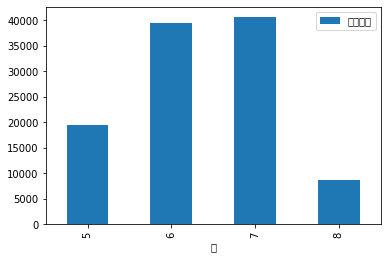

In [59]:
pd.pivot_table(data=df1, index="월", values="출고수량", aggfunc="sum").plot(kind="bar")

<AxesSubplot: xlabel='주차'>

C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\s

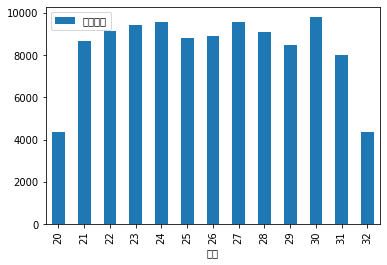

In [56]:
pd.pivot_table(data=df1, index="주차", values="출고수량", aggfunc="sum").plot(kind="bar")

<AxesSubplot: xlabel='일자'>

C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\s

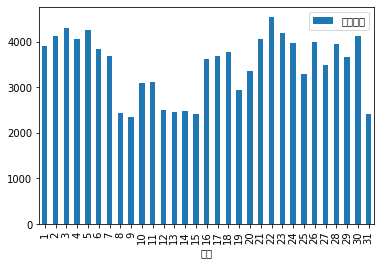

In [57]:
pd.pivot_table(data=df1, index="일자", values="출고수량", aggfunc="sum").plot(kind="bar")

<AxesSubplot: xlabel='요일'>

C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\ahnjh\AppData\Roaming\Python\Python310\s

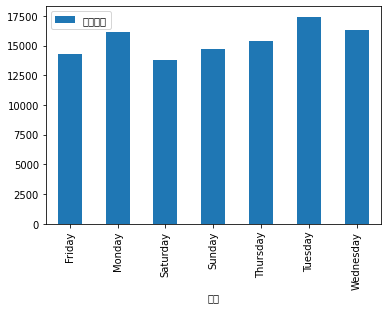

In [58]:
pd.pivot_table(data=df1, index="요일", values="출고수량", aggfunc="sum").plot(kind="bar")